In [1]:
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.tools.plotting import scatter_matrix

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")
    

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
PUIdata = os.getenv('PUIDATA')
nrg = gp.GeoDataFrame.from_csv(PUIdata + 
                               "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")


In [3]:
nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')

In [4]:
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
Record Number,,,,,,,,,,,,,,,,,,,,,
12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,NaN,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,NaN,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,NaN,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8579e6d650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f855bb2de10>]], dtype=object)

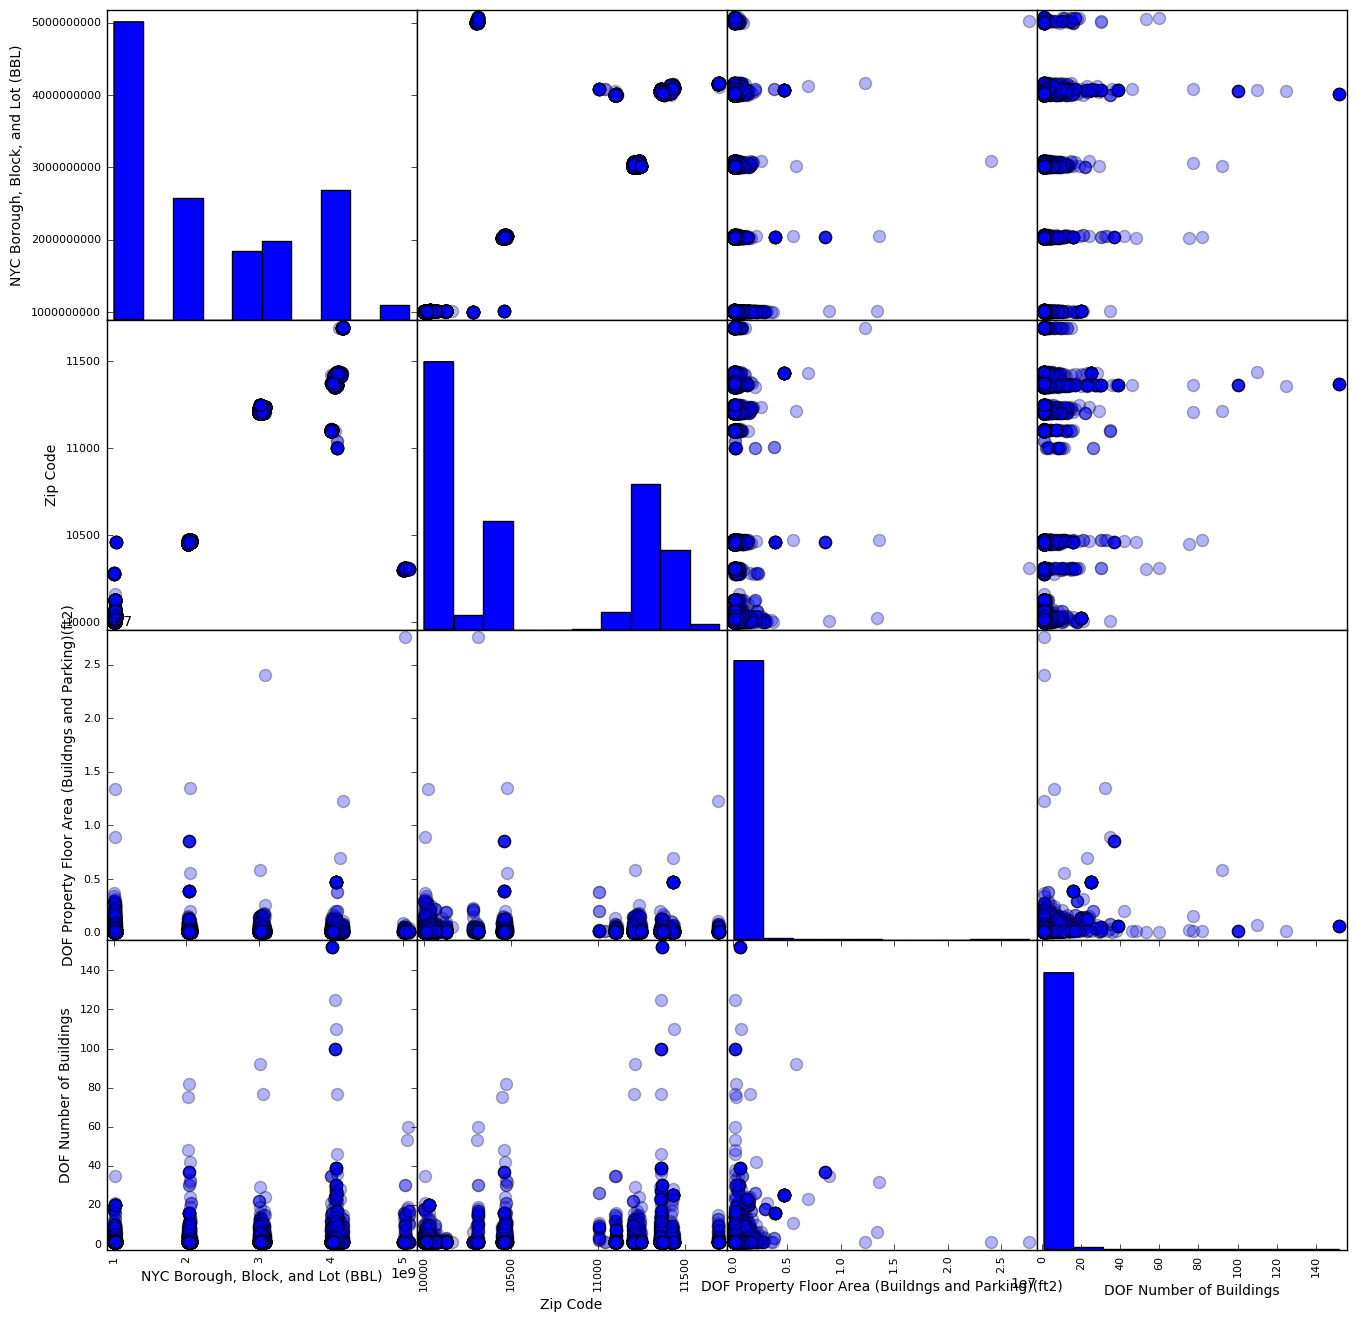

In [5]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16), alpha = 0.3)

In [6]:
nrg.rename(columns = {'NYC Borough, Block, and Lot (BBL)':'BBL'}, inplace = True)

In [7]:
nrg.head()

,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
Record Number,,,,,,,,,,,,,,,,,,,,,
12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,NaN,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,NaN,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,NaN,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [8]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False
    
vcanconvert = np.vectorize(canconvert)

#columns2convert = ['Site EUI(kBtu/ft2)']
columns2convert = nrg.columns

cans = {i:vcanconvert(nrg[i]) for i in columns2convert} 
for i in columns2convert:
    nrg.loc[~cans[i],i] = float('NaN')

In [9]:

#[...] check all columns you care about in both datasets. 
#Nan's are ok, but you must not get an error when you try the conversion
#the Pluto data is much better at not using spurious entries for numerical value columns. 
#but check you can use the columns you want
bsize = gp.GeoDataFrame.from_file(PUIdata+"/Manhattan/MNMapPLUTO.shp")
bsize.head()


,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,0.000000e+00,None,310 EAST 109 STREET,R7A,None,2,140102.0,343271.0,1.016800e+09,12000,...,0,1910,None,10029,R7A,None,None,None,6b,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,0.000000e+00,None,720 PARK AVENUE,R10/PI/LH-1A,R8B,2,5040000.0,30591900.0,1.013850e+09,203490,...,2006,1928,None,10021,R10,R8B,None,None,8c,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,0.000000e+00,None,3 WEST 83 STREET,R8B,R10A,2,437850.0,1267200.0,1.011970e+09,13839,...,0,1900,None,10024,R8B,R10A,None,None,5d,"POLYGON ((992273.6850000024 224863.4904000014,..."


In [10]:
bsize.BBL.astype(float)

0        1.015450e+09
1        1.007238e+09
2        1.016800e+09
3        1.013850e+09
4        1.011970e+09
5        1.002360e+09
6        1.008370e+09
7        1.001960e+09
8        1.022240e+09
9        1.011270e+09
10       1.011650e+09
11       1.021740e+09
12       1.009120e+09
13       1.007920e+09
14       1.012110e+09
15       1.011240e+09
16       1.009040e+09
17       1.010090e+09
18       1.020620e+09
19       1.020630e+09
20       1.008940e+09
21       1.005728e+09
22       1.004400e+09
23       1.019470e+09
24       1.008830e+09
25       1.020810e+09
26       1.021610e+09
27       1.008570e+09
28       1.008830e+09
29       1.020410e+09
             ...     
42667    1.014738e+09
42668    1.006208e+09
42669    1.007218e+09
42670    1.013428e+09
42671    1.019448e+09
42672    1.017298e+09
42673    1.018488e+09
42674    1.005008e+09
42675    1.020448e+09
42676    1.004518e+09
42677    1.020958e+09
42678    1.007688e+09
42679    1.008498e+09
42680    1.017298e+09
42681    1

In [11]:
indx = (np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg['Site EUI(kBtu/ft2)'][~indx] = float('NaN')

invalid entries changed to NaN 16170


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [12]:
nrg['TotalEnergy'] = nrg['Site EUI(kBtu/ft2)'].astype(float) * nrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)

nrg.dtypes

BBL                                                                float64
Co-reported BBL Status                                              object
BBLs Co-reported                                                    object
Reported NYC Building Identificaiton Numbers (BINs)                 object
Street Number                                                       object
Street Name                                                         object
Borough                                                             object
Zip Code                                                           float64
DOF Benchmarking Submission Status                                  object
Site EUI(kBtu/ft2)                                                  object
Weather Normalized Site EUI(kBtu/ft2)                               object
Source EUI(kBtu/ft2)                                                object
Weather Normalized Source EUI(kBtu/ft2)                             object
Municipally Supplied Pota

In [13]:

bblnrgdata = pd.merge(nrg, bsize, on = ['BBL'])


# Now the scatter matrix plot should show more columns.


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/indexes/base.py:2097: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target._values)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/indexes/base.py:1237: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


(0, 1000)

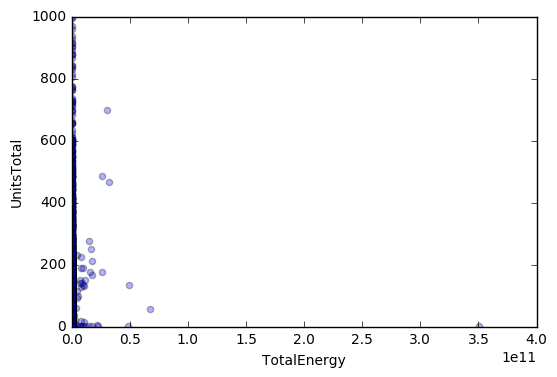

In [14]:
ax1 = bblnrgdata.plot(x = 'TotalEnergy', y = 'UnitsTotal', kind = 'scatter', alpha =0.3)
xlim(0,4e11)
ylim(0,1000)

(1, 1000)

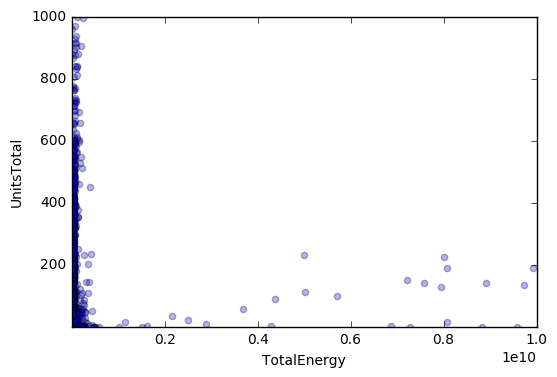

In [15]:
ax2 = bblnrgdata.plot(x = 'TotalEnergy', y = 'UnitsTotal', kind = 'scatter', alpha = 0.3)
#Adjust the xlim
xlim(1000,1e10)
ylim(1,1000)

when the points in a plot all look scrunched against the axis
Try to make a log plot instead. In pandas you enable that with the keyword 'loglog' : bblnrgdata.plot(..... loglog=True)

### NOTICE THAT YOU WILL STILL HAVE TO CUT YOUR DATASET! in my data I had a lot of energy datapoints that were exactly 0. I removed these "outliers" which I think are truly outliers in the sense that they are misreported numbers. you can remove the data that have nrg==0 (or nrg < some sensible threshold choice) by indexing your array: something like bblnrgdata_cut = bblnrgdata[bblnrgdata.nrg>1000]

In [16]:
# outlier removal
bblnrgdata_cut = bblnrgdata[bblnrgdata.TotalEnergy > 10000]
bblnrgdata_cut = bblnrgdata_cut[bblnrgdata_cut.UnitsTotal > 8]
bblnrgdata_cut = bblnrgdata_cut[bblnrgdata_cut.UnitsTotal < 1000]   

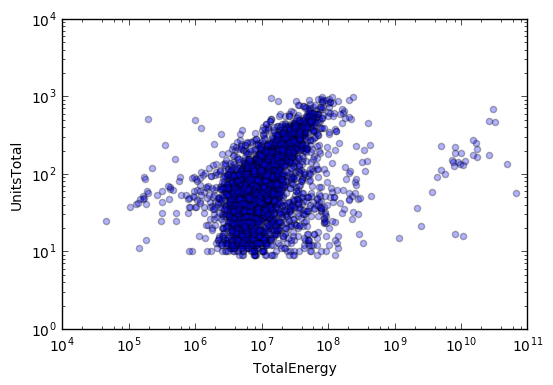

In [17]:
ax = bblnrgdata_cut.plot(x = 'TotalEnergy', y = 'UnitsTotal', kind = 'scatter', loglog = True, alpha = 0.3)


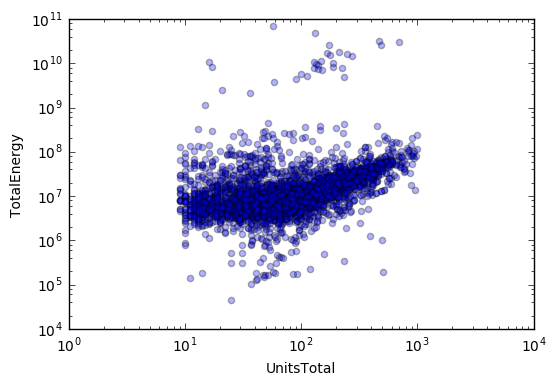

In [18]:
ax = bblnrgdata_cut.plot(x = 'UnitsTotal', y = 'TotalEnergy', kind = 'scatter', loglog = True, alpha = 0.3)



Now fit a line through the data. you can use whatever you want to do it: statsmodels, scipy, any other package, or write your own minimization of the residuals

## BUT REMEMBER: we see hints of a linear relation in log space! so we want to fit a line to the log of our variables, not the variables themselves:

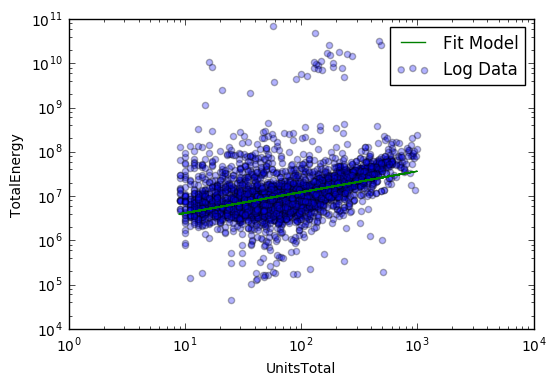

In [19]:
#fit units and energy
X = sm.add_constant(np.log10(bblnrgdata_cut['UnitsTotal']))
linmodel1 = sm.OLS(np.log10(bblnrgdata_cut['TotalEnergy']), X, missing='drop').fit() 
# ignores entires 
# where x or y is NaN
    
ax = bblnrgdata_cut.plot(x = 'UnitsTotal', y = 'TotalEnergy', kind = 'scatter', loglog = True, label = 'Log Data', alpha = 0.3)
ax.plot(bblnrgdata_cut['UnitsTotal'], 10**(linmodel1.predict()), c = 'g', label = 'Fit Model')
ax.legend()

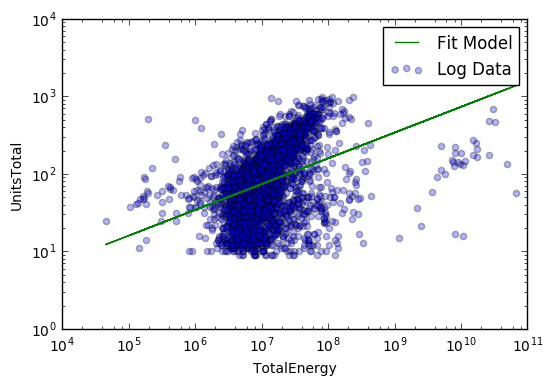

In [20]:
#fits energy and units
X = sm.add_constant(np.log10(bblnrgdata_cut['TotalEnergy']))
linmodel2 = sm.OLS(np.log10(bblnrgdata_cut['UnitsTotal']), X, missing='drop').fit() 
# ignores entires 
# where x or y is NaN
    
ax = bblnrgdata_cut.plot(x = 'TotalEnergy', y = 'UnitsTotal', kind = 'scatter', loglog = True, label = 'Log Data', alpha = 0.3)
ax.plot(bblnrgdata_cut['TotalEnergy'], 10**(linmodel2.predict()), c = 'g', label = 'Fit Model')
ax.legend()

In [21]:
def chisqcalc(model, x):
    chisq = sum(model.resid**2 / np.sqrt(x))
    return(chisq)
    
print (chisqcalc(linmodel1, np.log10(bblnrgdata_cut['UnitsTotal'])))

print (chisqcalc(linmodel2, np.log10(bblnrgdata_cut['TotalEnergy'])))

linmodel1.summary()

624.096538483
216.865638669


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalEnergy   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     798.7
Date:                Wed, 19 Oct 2016   Prob (F-statistic):          2.86e-161
Time:                        19:38:08   Log-Likelihood:                -2565.4
No. Observations:                4288   AIC:                             5135.
Df Residuals:                    4286   BIC:                             5147.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.1425      0.032    190.982      0.000         6.079     6.206
UnitsTotal     0.4728      0.017     28.260      0.000         0.440     0.506
==============================================================================
Omnibus:                     2323.385   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43084.632
Skew:                           2.172   Prob(JB):                         0.00
Kurtosis:                      17.909   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### so the first model is better -Units vs Energy.


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log10(TotalEnergy)   R-squared:                       0.157
Model:                               OLS   Adj. R-squared:                  0.157
Method:                    Least Squares   F-statistic:                     798.7
Date:                   Wed, 19 Oct 2016   Prob (F-statistic):          2.86e-161
Time:                           19:38:09   Log-Likelihood:                -2565.4
No. Observations:                   4288   AIC:                             5135.
Df Residuals:                       4286   BIC:                             5147.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Intercept                             6.1425      0.032    190.982      0.000         6.079     6.206
np.log10(np.power(UnitsTotal, 2))     0.1891      0.007     28.260      0.000         0.176     0.202
np.log10(UnitsTotal)                  0.0946      0.003     28.260      0.000         0.088     0.101
==============================================================================
Omnibus:                     2323.385   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43084.632
Skew:                           2.172   Prob(JB):                         0.00
Kurtosis:                      17.909   Cond. No.                     7.10e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

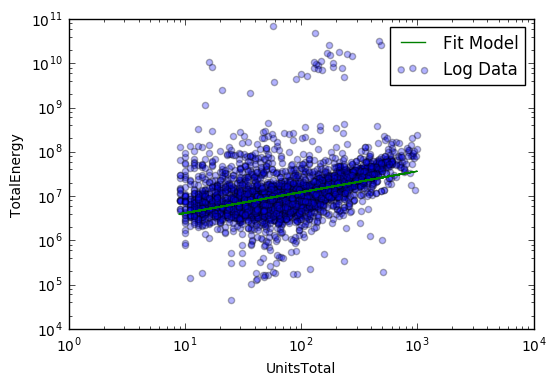

In [22]:
secDegree = smf.ols(formula = 'np.log10(TotalEnergy) ~ np.log10(np.power(UnitsTotal,2)) + np.log10(UnitsTotal)',
                    data = bblnrgdata_cut).fit()

ax = bblnrgdata_cut.plot(x = 'UnitsTotal', y = 'TotalEnergy', kind = 'scatter', loglog = True, label = 'Log Data',
                        alpha = 0.3)
ax.plot(bblnrgdata_cut['UnitsTotal'], 10**secDegree.predict(), c = 'g', label = 'Fit Model')
ax.legend()

secDegree.summary()

##### Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test. The formula is:
LR = -2 * (logLikelihood_Model1 - logLikelihood_Model2)
where Model1 is the least complex (fewer parameters).
Th logLikelihood can be extracted from the model summary when using statsmodels.
Compare this LR statistics to a chi sq table (for example http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG) and say if at alpha = 0.05 Model1 is preferible to Model2. The LR is chi^2 distributed with number of degrees of freedom N_{DOF} = parameters_Model2 - parameters_Model1
Also if you used statsmodels for the fit you can use the 
compare_lr_test() method of your fit and verify you got the right answer.  Use the method compare_lr_test() of the most complex model of the 2 and pass it the result of stats models for the simpler fit 
(e.g. smf.ols(formula = ...).fit().compare_lr_test(sm.OLS(...).fit()))


In [23]:
print ("LR : ", -2 * (-linmodel1.llf - (-secDegree.llf)))
print ("LR from statsmodels:", secDegree.compare_lr_test(linmodel1))

('LR : ', 1.8189894035458565e-12)
('LR from statsmodels:', (-1.8189894035458565e-12, nan, 0.0))


### Extra credit 1: calculate and plot the likelihood surface¶


#####   Create a function that minimizes the residuals:

the residuals are the sum of the differences between data and model: in the case of a line fit model. Use the same function you created for the chi^2 test.

You should sum over each datapoints the residuals squared, which should look something like

(np.log(bblnrgdatacut.nrg) - np.log(bblnrgdatacut.UnitsTotal)*a+b )^2 / errors^2

where a and b are the parameters returned by the line fitter.
For each data point you can calculate the model at different values : for example in a range B = np.arange (-100, 100, 1) for the intercept, and A = np.arange(-50.0, 50.0, 0.5) for the slope.

You can write it as a nested for loop (or challenge yourself and vectorize it!) with a loop inside another ranging all poissible combinations of the 2 variables (i use enumerate to get both an index from 0 to the size of my array, which i assign to i (and j) and the value of the array at that index - look up the syntax!):

Lsurface = np.zeros((len(A), len(B))) for i,a in enumerate(A): for j,b in enumerate(B): Lsurface[i][j] = np.nansum(residuals(a,b,data,errors)) .....
this gives you a 2D array that represents your likelihood surface! What we do to find a good fit is find the minimum (lowest point) on this surface. You can plot a surface (a 2D array) with pl.imshow(Lsurface) as a "heatmap" but when you do that you will find that the plot is very uninformative. just like you did before with the data, plot the log of it (pl.imshow(np.log(Lsurface)). Also make sure your x and y axes tick numbers represent the range of values, not the cell index, which is the default for imshow. Inputting your data in the cell below should give a plot similar to mine


In [24]:
errors = np.log10(bblnrgdata.TotalEnergy)/2

In [25]:
def residual(a,b): 
    re = (np.log10(bblnrgdata.TotalEnergy) - (np.log10(bblnrgdata.UnitsTotal)*a+b))**2 
    return (re/ errors**2).sum()

In [26]:
intercp = np.arange (-100, 100, 1)
slope =  np.arange(-50.0, 50.0, 0.5)

In [27]:
Lsurface = np.zeros((len(slope), len(intercp)))
vecres = np.vectorize(residual)
Lsurface = np.array([vecres(slope, i) for i in intercp]).reshape(len(slope), len(intercp))

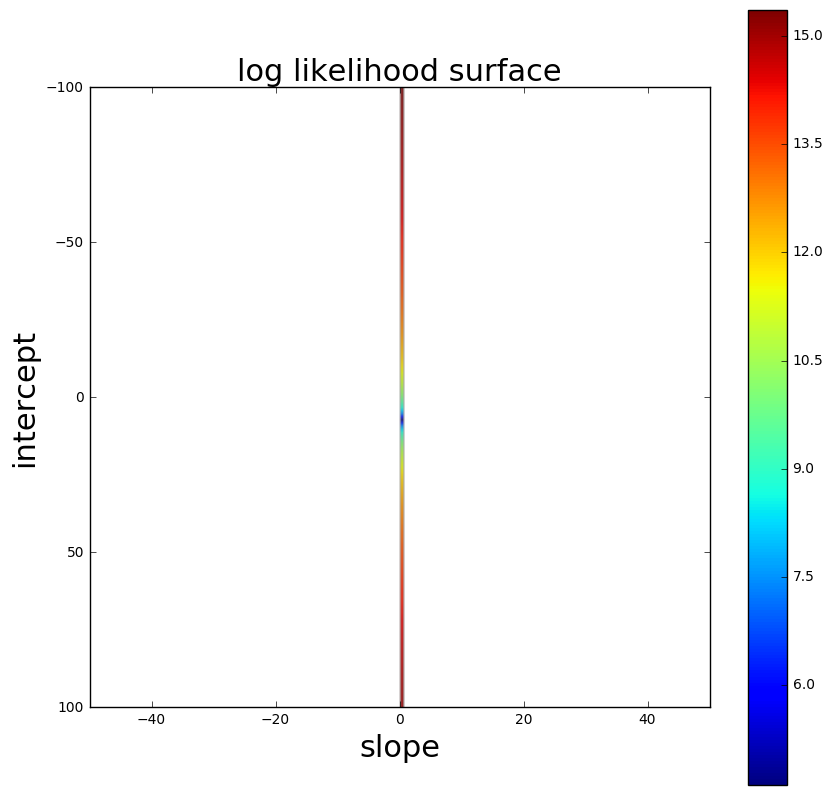

In [28]:
pl.figure(figsize=(10,10))
pl.title ("log likelihood surface", fontsize = 22)
pl.imshow(np.log(Lsurface), extent = [-50,50,100,-100], aspect=0.5)
pl.xlabel('slope', fontsize = 22)
pl.ylabel('intercept', fontsize = 22)
pl.colorbar()

### Extra Credit 2: get creative with the dataset. can you make an insigntful plot to show any structure in the data?

In [29]:
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [ ]:
bblnrgdata['YearBuilt'][bblnrgdata['YearBuilt']<1800]=1800

bblnrgdata.plot(kind='scatter',x='nrg',y='UnitsTotal', 
                fontsize=22, colormap='gist_rainbow', alpha = 1, 
                marker='o',  figsize=(16, 14), loglog=True,  
                xlim=(1000,1e11), ylim=(1,1000), 
                c=bblnrgdata['YearBuilt']-1900, 
                s=bblnrgdata['UnitsTotal']/bblnrgdata['UnitsRes']*100)
pl.title('Color maps Age in years, Size maps tital/residential units', fontsize=18)
pl.ylabel("total number of units", fontsize=22)
pl.xlabel("total energy consumption (kBtu)", fontsize=22)